# Workshop I

## Required libraries

In [90]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## Exercise 1

In [91]:
# Let's begin by creating variables associated with rows and columns of the rectangular matrix
rows = 4
cols = 3

#Lest's create a matrix with random values

A = np.random.rand(rows, cols)

A

array([[2.35281579e-01, 3.09001040e-01, 4.41832049e-01],
       [5.20729948e-01, 4.55517322e-01, 2.06948482e-04],
       [8.62196460e-01, 2.37386214e-02, 8.81550610e-01],
       [8.22817745e-01, 9.36699108e-01, 3.13963450e-01]])

### Calculating matrix rank

In [92]:
# It is important to remember that matrix rank is the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix.
# And also is equal to the least value of the number of rows and columns of the matrix. So the answer is 3.
A_rank = np.linalg.matrix_rank(A)
A_rank

3

### Calculating matrix trace

In [93]:
A_trace = A.trace()
A_trace

1.572349510565603

In [94]:
#The trace of a matrix is the sum of its diagonal elements. lest's calculate this value with a for loop.
i = 0
trace_sum = 0
for i in range(min(len(A), len(A[0]))):
    trace_sum += A[i][i]

print(trace_sum)

1.572349510565603


As you can see, the value is equal for both methods, so the matrix trace was correctly computed

### Calculating matrix determinant

In [95]:
matrix_det = np.linalg.det(A)

# It is important to stablish that matrix determinant cannot be calculated for a rectangular matrix. So this is why we will getting an error message.

LinAlgError: Last 2 dimensions of the array must be square

If we want to calculate the determinant of a matrix, we need to make sure that the matrix is square. So let's create the equivalent square matrix for A.

In [96]:
# Determine the desired square size (e.g., max of rows and columns)
square_size = max(A.shape)

# Create a square matrix by padding values from the rectangular matrix
square_matrix = np.zeros((square_size, square_size), dtype=A.dtype)
square_matrix[:A.shape[0], :A.shape[1]] = A

print("Rectangular Matrix:")
print(A)

print("\nSquare Matrix with Duplicated Values:")
print(square_matrix)

Rectangular Matrix:
[[2.35281579e-01 3.09001040e-01 4.41832049e-01]
 [5.20729948e-01 4.55517322e-01 2.06948482e-04]
 [8.62196460e-01 2.37386214e-02 8.81550610e-01]
 [8.22817745e-01 9.36699108e-01 3.13963450e-01]]

Square Matrix with Duplicated Values:
[[2.35281579e-01 3.09001040e-01 4.41832049e-01 0.00000000e+00]
 [5.20729948e-01 4.55517322e-01 2.06948482e-04 0.00000000e+00]
 [8.62196460e-01 2.37386214e-02 8.81550610e-01 0.00000000e+00]
 [8.22817745e-01 9.36699108e-01 3.13963450e-01 0.00000000e+00]]


In [97]:
A_det = np.linalg.det(square_matrix)
A_det

0.0

In this case, determinant is computed but is equal to zero because we made a zero padding inside the rectangular matrix

### ¿Can you invert A matrix? How?

#### It is important to establish that only squared matrix are invertible, so matrix A will not be naturally invertible. However, any matrix can be invertible if the pseudoinverse matrix is used. Let's calculate this matrix and this will be our "inverse" matrix of A

In [98]:
pseudo_A = np.linalg.pinv(A)
pseudo_A

array([[-1.77030381,  1.34342139,  0.91994793, -0.0926277 ],
       [ 1.24579927, -0.39160181, -0.93440992,  0.87072758],
       [ 1.7426987 , -1.24274225,  0.25300975,  0.02304775]])

### How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

#### In order to solve this question, we need to compute right and left eingenvectors and the eigenvalues for both scenarios: A'A and AA'. Let's do this:

In [99]:
Left_eigenvectors_ATA, eigenvalues_ATA, right_eigenvectors_ATA = np.linalg.svd(A.T @ A)

print("Left eigenvectors A'A:")
print(Left_eigenvectors_ATA)

print("\nEigenvalues A'A:")
print(eigenvalues_ATA)

print("\nRight eigenvectors A'A:")
print(right_eigenvectors_ATA)

Left eigenvectors A'A:
[[-0.72571632  0.06598618 -0.68482235]
 [-0.49384559 -0.74299664  0.45174387]
 [-0.47901185  0.6660344   0.57179177]]

Eigenvalues A'A:
[3.23711219 0.67830169 0.08338155]

Right eigenvectors A'A:
[[-0.72571632 -0.49384559 -0.47901185]
 [ 0.06598618 -0.74299664  0.6660344 ]
 [-0.68482235  0.45174387  0.57179177]]


In [100]:
Left_eigenvectors_AAT, eigenvalues_AAT, right_eigenvectors_AAT = np.linalg.svd(A @ A.T)

print("Left eigenvectors AA':")
print(Left_eigenvectors_AAT)

print("\nEigenvalues AA':")
print(eigenvalues_AAT)

print("\nRight eigenvectors A'A:")
print(right_eigenvectors_AAT)

Left eigenvectors AA':
[[-0.29734881  0.09739539  0.80031953 -0.51145525]
 [-0.33512526 -0.36905348 -0.52193079 -0.69215522]
 [-0.58898834  0.76056995 -0.26203285  0.07723252]
 [-0.67258269 -0.5252114   0.13570439  0.50335855]]

Eigenvalues AA':
[3.23711219e+00 6.78301685e-01 8.33815453e-02 1.10299769e-16]

Right eigenvectors A'A:
[[-0.29734881 -0.33512526 -0.58898834 -0.67258269]
 [ 0.09739539 -0.36905348  0.76056995 -0.5252114 ]
 [ 0.80031953 -0.52193079 -0.26203285  0.13570439]
 [-0.51145525 -0.69215522  0.07723252  0.50335855]]


##### The most interesting difference between eigenvectors is the fact that in AA' scenario, their dimensionality is greater than in A'A scenario. Moreover, if you compare the eigenvalues, you will notice that they are equal in both scenarios, except when values are near to zero.

## Exercise 2

### First, it is important to change the dimensions of the photo

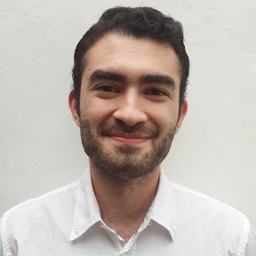

In [101]:
img = Image.open("C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos/Juan José Gil Hoyos.jpg")
img = img.resize([256,256])
img

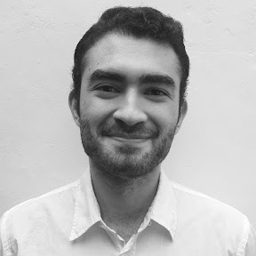

In [102]:
# Convert the image to grayscale
grayscale_image = img.convert("L")

grayscale_image

Then, we have to access to the photos of the cohort. First, we have to set the folder path. The path below corresponds to the folder available in our Microsoft Teams channel. If you want to execute this code again, please set the right path.

In [103]:
folder_path = "C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas"

# Use os.listdir() to get a list of all items (files and directories) in the folder
items_in_folder = os.listdir(folder_path)
photos_names = []
# Filter out only the .jpg files
jpg_files = [item for item in items_in_folder if item.endswith(".jpg")]

# Print the extracted .jpg file names
for jpg_file in jpg_files:
    photos_names.append(jpg_file)

photos_names

['AE256.jpg',
 'AnaEstefaniaHenaogrises.jpg',
 'AndresFelipeOrrego.jpg',
 'DanielAcosta.jpg',
 'DanielRestrepo.jpg',
 'Diego.jpg',
 'edward_giraldo_gray.jpg',
 'edwar_ramirez_gs.jpg',
 'esteban_jm.jpg',
 'FedericoOcampo.jpg',
 'Fernando_Franco_grayscale.jpg',
 'Foto_procesada.jpg',
 'JenniferD.jpg',
 'jessica_torres_f.jpg',
 'johan_vargas.jpg',
 'JuanJoseGilHoyos_grayscale.jpg',
 'Laura_Torres_prep.jpg',
 'Lina_Beltran.jpg',
 'lina_montoya.jpg',
 'maria_ipia.jpg',
 'OsvalAgudelo256256.jpg',
 'SEBASTIANHOLGUINOSORIO.jpg',
 'sebastian_torres.jpg',
 'SGZ_gray.jpg',
 'shir.jpg',
 'Vanessa_256x256_grises.jpg',
 'Viviana_256x256_grises.jpg']

Ones we get the name of the photos and with their extension, we will be able to concatenate the path with the name of the photos and get the complete photo path. This will allow us to access to the photos.

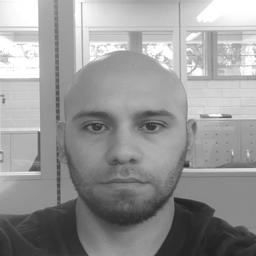

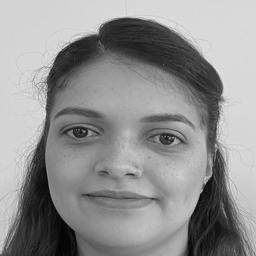

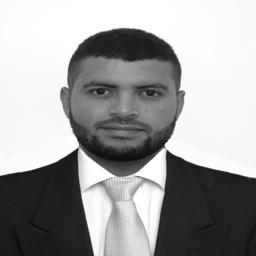

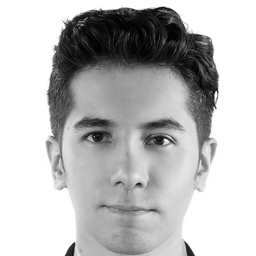

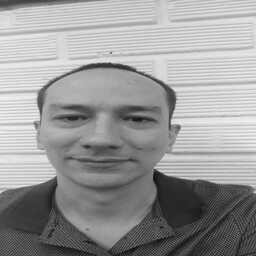

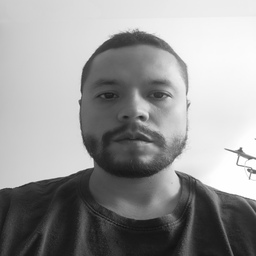

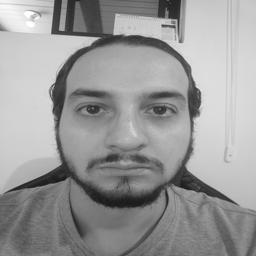

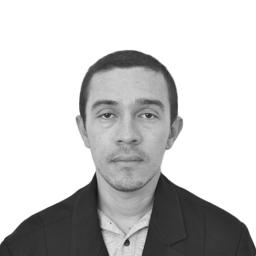

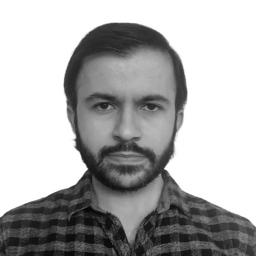

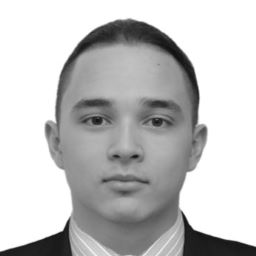

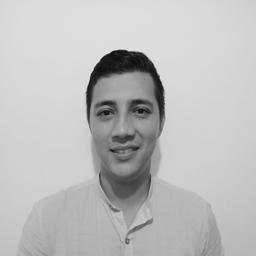

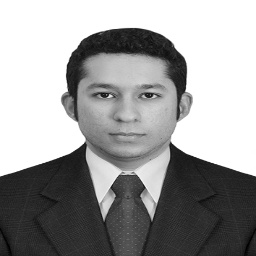

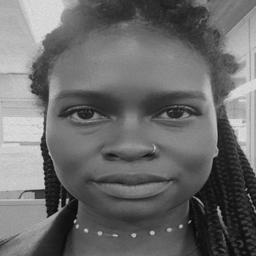

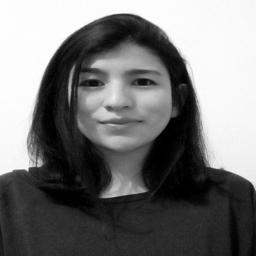

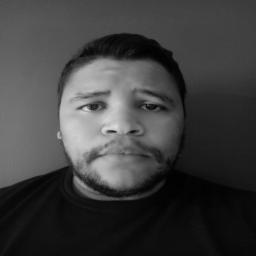

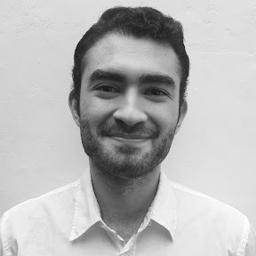

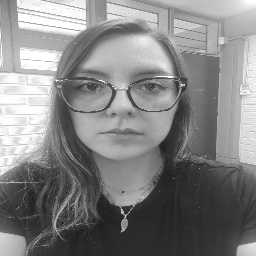

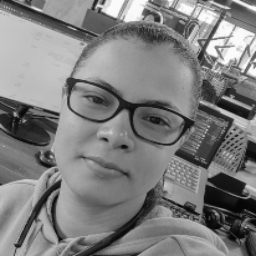

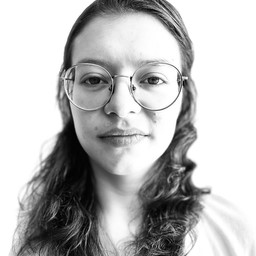

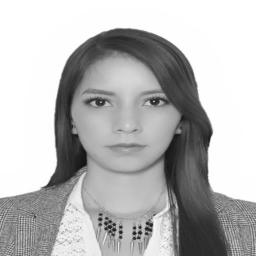

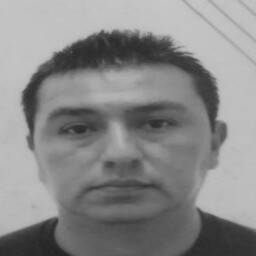

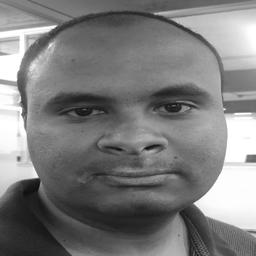

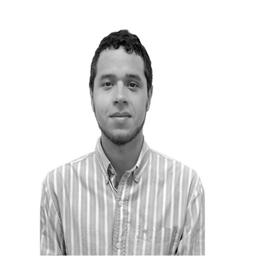

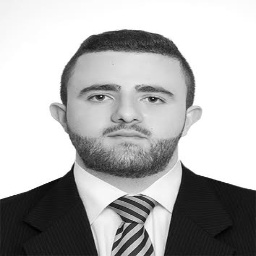

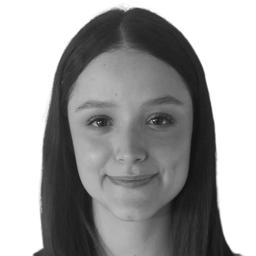

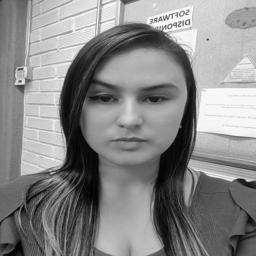

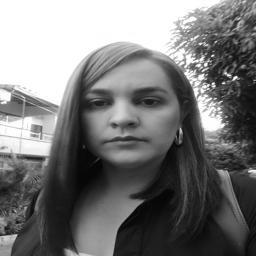

In [105]:
photo_paths = []
for i in photos_names:
    photo_path = folder_path + '/' + i
    photo_paths.append(photo_path)
    photo = Image.open(photo_path)
    display(photo)

In [106]:
photo_paths

['C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/AE256.jpg',
 'C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/AnaEstefaniaHenaogrises.jpg',
 'C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/AndresFelipeOrrego.jpg',
 'C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/DanielAcosta.jpg',
 'C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/DanielRestrepo.jpg',
 'C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/Diego.jpg',
 'C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/edward_giraldo_gray.jpg',
 'C:/Users/juanj/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/edwar_ramirez_gs.jpg',
 'C:/Users/juanj/Universidad de 

Now, we have to read the photos and convert them to a numpy array. This will allow us to work with the photos as matrices in order to compute the average face matrix:

In [107]:
# Define a common size for all images (e.g., 256x256)
common_size = (256, 256)

# Initialize an accumulator matrix to store the sum of all pixel values
total_matrix_needed = None

# Iterate through the images and accumulate the pixel values
for image_path_needed in photo_paths:
    # Load and read the image as a matrix
    image_first_needed = cv2.imread(image_path_needed)

    if image_first_needed is not None:

        # Resize the image to the common size
        image_needed = cv2.resize(image_first_needed, common_size)
        
        # Convert the image to a NumPy array
        image_matrix_needed = np.array(image_needed, dtype=np.float32)

        # Add the image matrix to the accumulator matrix
        if total_matrix_needed is None:
            total_matrix_needed = image_matrix_needed
        else:
            total_matrix_needed += image_matrix_needed

    else:
        print(f"Failed to load image: {image_path_needed}")

# Calculate the average face by dividing the accumulated matrix by the number of images
num_valid_images = len(photo_paths)-photo_paths.count(None)
average_face_matrix = total_matrix_needed / num_valid_images

# Now, average_face_matrix contains the average face as a NumPy array

Let's plot and save the average face of the cohort:

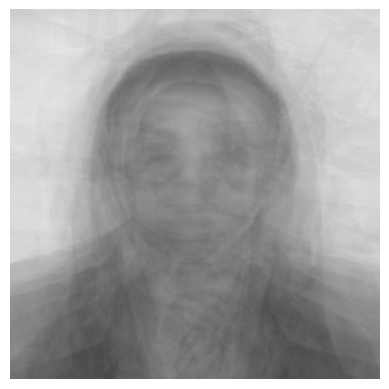

In [108]:
average_image_cohort_first = average_face_matrix.astype(np.uint8)

plt.imshow(average_image_cohort_first)
plt.axis('off')
plt.savefig('average_face.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

Now it is necessary to resize the saved image. It is important to notice that saved image will be available inside the same folder of this notebook.

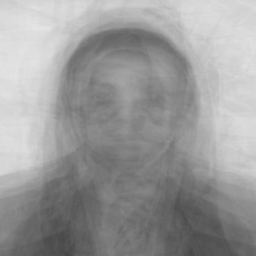

In [109]:
average_image_cohort_second = Image.open("average_face.jpg")
average_image_cohort_third = average_image_cohort_second.resize([256,256])
average_image_cohort_third

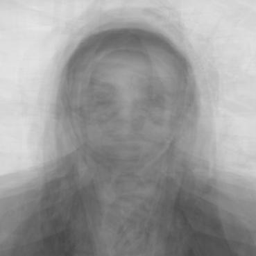

In [110]:
# Convert the image to grayscale
average_image_cohort = average_image_cohort_third.convert("L")

average_image_cohort

Finally, we will use the Mean squared Error distance concept to establish how distant my face is from the average face of the cohort:

In [111]:
# Load your face image and average face image (assuming they are grayscale)

# My face: grayscale_image
# Cohort face: average_image_cohort

My_face_matrix = np.array(grayscale_image, dtype=np.float32)
average_face_cohort_matrix = np.array(average_image_cohort, dtype=np.float32)

# Calculate the mean squared error (MSE) distance
mse_distance = np.mean((My_face_matrix - average_face_cohort_matrix) ** 2)

print(f'Mean Squared Error (MSE) Distance: {mse_distance:.2f}')

Mean Squared Error (MSE) Distance: 5033.96


According to the result in the Mean Squared Error Distance, it can be concluded that my face is quite far from the average of the cohort. This is because a higher MSE value indicates greater dissimilarity between the two images.

## Exercise 3

In order to create the required Python packages, Object-oriented programming was used. This means that the code is divided into classes and functions. The classes are the following: 

Here you will find one class for the SVD implementation, other class for PCA and finally, a class for tSNE method implementation. Inside each class, you are able to see that we applied te fit, transform and fit_transform methods, just like the exercise asked.

### SVD implementation

In [112]:
class SVD_class:
    def __init__(self, matrix):
        self.matrix = matrix
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self, matrix = None):
        self.U, self.S, self.Vt = self._svd_decomposition(self.matrix)

    def fit_transform(self, data = None):
        self.fit()
        return self.transform()

    def transform(self):
        if self.U is None or self.S is None or self.Vt is None:
            raise ValueError("SVD not computed. Call fit or fit_transform first.")
        
        # Adjust the dimensions for the dot product
        U = self.U
        S = np.diag(self.S)
        Vt = self.Vt
        
        return np.dot(U, np.dot(S, Vt))

    def _svd_decomposition(self, A):
        # Implement SVD from scratch (truncated to the rank)
        AAT = np.dot(A, A.T)
        eigenvalues, eigenvectors = np.linalg.eig(AAT)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        singular_values = np.sqrt(eigenvalues)
        U = eigenvectors
        V = np.dot(A.T, U)
        Vt = V.T

        return U, singular_values, Vt

# Example usage:
if __name__ == "__main__":
    X_SVD = np.array([[1, 2],
                  [3, 4],
                  [5, 6]])

    svd = SVD_class(X_SVD)

    # Fit and perform SVD decomposition
    svd.fit()
    U, S, Vt = svd.U, svd.S, svd.Vt

    print("Matrix U:")
    print(U)
    print("\nSingular Values:")
    print(S)
    print("\nMatrix Vt:")
    print(Vt)

    # Transform the matrix using fitted SVD
    transformed_matrix = svd.transform()
    print("\nTransformed Matrix:")
    print(transformed_matrix)

    # Fit and transform in one step
    transformed_matrix_fit = svd.fit_transform()
    print("\nTransformed Matrix (Fit and Transform):")
    print(transformed_matrix_fit)

Matrix U:
[[-0.2298477  -0.88346102  0.40824829]
 [-0.52474482 -0.24078249 -0.81649658]
 [-0.81964194  0.40189603  0.40824829]]

Singular Values:
[9.52551809e+00 5.14300581e-01 8.72994256e-10]

Matrix Vt:
[[-5.90229186e+00 -7.47652631e+00]
 [ 4.03671673e-01 -3.18675803e-01]
 [-9.43689571e-16  9.99200722e-16]]

Transformed Matrix:
[[12.73917226 16.51403919]
 [29.45241823 37.41062764]
 [46.1656642  58.3072161 ]]

Transformed Matrix (Fit and Transform):
[[12.73917226 16.51403919]
 [29.45241823 37.41062764]
 [46.1656642  58.3072161 ]]


Now that we already applied the SVD class method, let´s compare the results with the actual Python method for SVD:

In [113]:
# Perform SVD decomposition
U, S, Vt = np.linalg.svd(X_SVD, full_matrices=False)

# Print the results
print("Matrix U:")
print(U)
print("\nSingular Values:")
print(S)
print("\nMatrix Vt:")
print(Vt)

# Transform the matrix using SVD
transformed_matrix = np.dot(U, np.dot(np.diag(S), Vt))
print("\nTransformed Matrix:")
print(transformed_matrix)

# Fit and transform in one step
transformed_matrix_fit = np.dot(U, np.dot(np.diag(S), Vt))
print("\nTransformed Matrix (Fit and Transform):")
print(transformed_matrix_fit)

Matrix U:
[[-0.2298477   0.88346102]
 [-0.52474482  0.24078249]
 [-0.81964194 -0.40189603]]

Singular Values:
[9.52551809 0.51430058]

Matrix Vt:
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]

Transformed Matrix:
[[1. 2.]
 [3. 4.]
 [5. 6.]]

Transformed Matrix (Fit and Transform):
[[1. 2.]
 [3. 4.]
 [5. 6.]]


Altough transformed matrix and transformed matrix (Fit and Transform) are equal for each individual approach, they are not equal when we compare the results of the SVD class with the actual Python method for SVD. This is because the actual Python method for SVD is based on the Singular Value Decomposition algorithm, which is a more complex method than the one we implemented. However, the results are quite similar.

### PCA implementation

Just like we did with the SVD scenario analysis, let's analyze the PCA class created and compare it with the actual Python method for PCA:

In [114]:
class PCA_class:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        # Calculate the mean of the data
        self.mean = np.mean(X, axis=0)
        
        # Center the data
        X_centered = X - self.mean
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        # Perform eigenvalue decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        
        # Select the top n_components eigenvectors
        if self.n_components is not None:
            self.components = eigenvectors[:, :self.n_components]
        else:
            self.components = eigenvectors

    def transform(self, X):
        if self.components is None:
            raise ValueError("PCA has not been fitted yet. Call fit() first.")
        
        # Center the data
        X_centered = X - self.mean
        
        # Project the data onto the principal components
        return np.dot(X_centered, self.components)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Example usage:
if __name__ == "__main__":    

    np.random.seed(0)
    X_PCA = np.random.rand(100, 50)  # 100 samples, 50 features
    
    # Initialize and use the PCA class
    pca = PCA_class(n_components=2)
    pca.fit(X_PCA)
    X_transformed = pca.fit_transform(X_PCA)

    print("Original X:")
    print(X_PCA)
    print("\nTransformed X:")
    print(X_transformed)


Original X:
[[0.5488135  0.71518937 0.60276338 ... 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 ... 0.02010755 0.82894003 0.00469548]
 [0.67781654 0.27000797 0.73519402 ... 0.91948261 0.7142413  0.99884701]
 ...
 [0.22996725 0.38153411 0.05718279 ... 0.6781559  0.99735368 0.07799664]
 [0.75896886 0.81742451 0.28220144 ... 0.36130004 0.99238159 0.65696337]
 [0.25107007 0.53286606 0.09523193 ... 0.19738826 0.39868722 0.9585931 ]]

Transformed X:
[[ 0.30895165 -0.34363356]
 [-0.1752182   0.10585016]
 [-0.30849383  0.42951593]
 [-0.29370052  0.26801367]
 [ 0.05015827 -0.11671786]
 [ 0.7809401  -0.52242425]
 [ 0.32759337 -0.21652829]
 [-0.93874466  0.58847971]
 [ 0.79844958 -0.86778556]
 [ 0.77528797 -0.37395712]
 [-0.22969316 -0.12469405]
 [ 0.15809732  1.03094793]
 [ 0.17635555 -0.02765265]
 [ 0.75738536  0.04003985]
 [ 0.23206988 -0.18421739]
 [-0.08319497  0.64602548]
 [-0.46188805 -0.17610094]
 [-0.87425654 -0.41349351]
 [-0.83198568 -0.22673637]
 [ 0.29208348  

In [115]:
# Initialize PCA with the number of components you want to retain
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA to the data and transform it
X_transformed = pca.fit_transform(X_PCA)

# Access the explained variance ratio (proportion of total variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components (eigenvectors)
components = pca.components_

# Access the mean of the data
mean = pca.mean_

print("Original X:")
print(X_PCA)
print("\nTransformed X:")
print(X_transformed)


Original X:
[[0.5488135  0.71518937 0.60276338 ... 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 ... 0.02010755 0.82894003 0.00469548]
 [0.67781654 0.27000797 0.73519402 ... 0.91948261 0.7142413  0.99884701]
 ...
 [0.22996725 0.38153411 0.05718279 ... 0.6781559  0.99735368 0.07799664]
 [0.75896886 0.81742451 0.28220144 ... 0.36130004 0.99238159 0.65696337]
 [0.25107007 0.53286606 0.09523193 ... 0.19738826 0.39868722 0.9585931 ]]

Transformed X:
[[-0.30895165 -0.34363356]
 [ 0.1752182   0.10585016]
 [ 0.30849383  0.42951593]
 [ 0.29370052  0.26801367]
 [-0.05015827 -0.11671786]
 [-0.7809401  -0.52242425]
 [-0.32759337 -0.21652829]
 [ 0.93874466  0.58847971]
 [-0.79844958 -0.86778556]
 [-0.77528797 -0.37395712]
 [ 0.22969316 -0.12469405]
 [-0.15809732  1.03094793]
 [-0.17635555 -0.02765265]
 [-0.75738536  0.04003985]
 [-0.23206988 -0.18421739]
 [ 0.08319497  0.64602548]
 [ 0.46188805 -0.17610094]
 [ 0.87425654 -0.41349351]
 [ 0.83198568 -0.22673637]
 [-0.29208348  

If you compare the class method approach and the Python package approach results, you will notice that there is a slight difference between the transformed matrices. In the Python package approach, the transformed matrix elements have opposite sign than the ones in the class method approach.

Here are a few potential reasons for sign differences:

**Eigenvalue Decomposition Order:** The sign of the eigenvectors depends on the order in which the eigenvalue decomposition is performed. Different libraries or implementations may use different conventions for ordering eigenvectors. This can result in flipped signs.

**Data Centering:** PCA typically involves centering the data by subtracting the mean of each feature. If the centering is done differently in your custom implementation compared to the library-based implementation, it can lead to sign differences.

**Principal Component Direction:** PCA doesn't enforce a unique sign for the principal components. The direction of the principal components can be flipped without affecting the overall variance explained by them.

### tSNE implementation

Finally, just like we did with the SVD and PCA scenario analysis, let's analyze the tSNE class created and compare it with the actual Python method for tSNE:

In [116]:
class TSNE_class:


  def __init__(self, perplexity=30):
    self.perplexity = perplexity

 

  def fit(self, X):
    n_samples, n_features = X.shape

 
    # Initialize the data points in a low-dimensional space.

    self.Y = np.random.rand(n_samples, 2)

 
    # Calculate pairwise Euclidean distances in the high-dimensional space.
    dist_matrix = np.sum((X[:, np.newaxis] - X)**2, axis=2)

 
    # Calculate similarities using a Gaussian kernel (perplexity-dependent)
    self.D = np.exp(-dist_matrix / (2.0 * self.perplexity))

    return self

  def fit_transform(self, X):
    self.fit(X)
    return self.Y


  def transform(self, X):
    n_samples, n_features = X.shape

 
    # Calculate the similarities between the data points in the high-dimensional space.

    D = np.exp(-np.sum((X - X.T)**2, axis=1))


    # Calculate the similarities between the data points in the low-dimensional space.

    P = np.exp(-np.sum((self.Y - self.Y.T)**2, axis=1))

    # Use an optimization algorithm to update the positions of the data points in the low-dimensional space.

    for i in range(10000):
      self.Y = self.Y - (P / np.sum(P, axis=0)) * (self.Y - self.Y.T)

    return self.Y

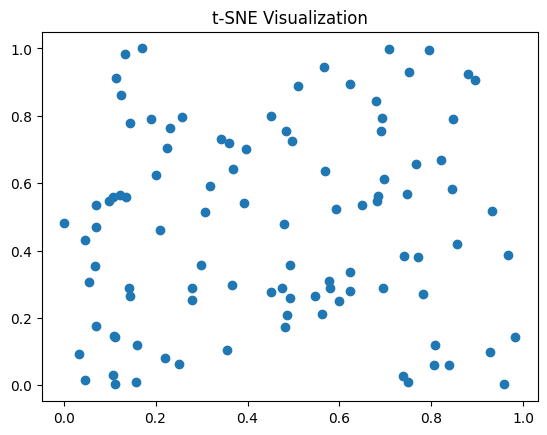

In [117]:
# Create a random dataset (replace this with your actual data)

np.random.seed(0)

X_tSNE = np.random.rand(100, 50)  # 100 samples, 50 features

# Create an instance of your TSNE_class
tsne = TSNE_class(perplexity=30)

# Fit and transform the data to obtain the low-dimensional representation
Y = tsne.fit_transform(X_tSNE)
 
# Plot the results (optional)
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("t-SNE Visualization")
plt.show()

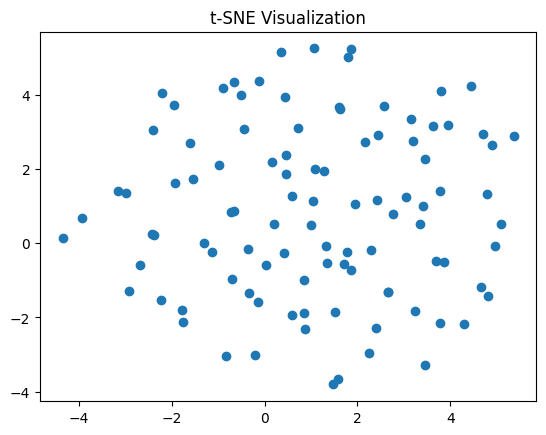

In [118]:
# Create an instance of the TSNE class

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)


# Fit and transform the data to obtain the low-dimensional representation
Y = tsne.fit_transform(X_tSNE)


# Plot the results
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("t-SNE Visualization")
plt.show()

If you compare both graphs, you will notice that data points distribution is quite similar. However, there is a huge difference between charts scale. In the Object-oriented programming approach, the scale in the y-axis is between 0 and 1, but in the Python libraries approach, the scale in the same axis is less than 0 and greater than 6.

t-SNE is a stochastic algorithm, which means that different runs or implementations may produce slightly different results, including variations in the scale and position of the clusters in the output visualization. Here are some possible reasons for the differences in graph scales:

**Random Initialization:** t-SNE starts with a random initialization of the data points in the low-dimensional space. Different implementations or runs may use different random seeds, leading to variations in the positions of points in the visualization.

**Hyperparameter Settings:** The behavior of t-SNE can be sensitive to hyperparameters such as the perplexity and learning rate. Different implementations may have different default settings or conventions for these hyperparameters, which can affect the scale and layout of the visualization.

**Convergence Criteria:** t-SNE is an iterative optimization algorithm, and different implementations may use different convergence criteria or termination conditions. This can lead to variations in the final layout of the points.

## Exercise 4

In order to Apply SVD over the picture of my face, we are going to progressively increasing the number of singular values used in both class approach and built-in SVD Python method approach. Then we are going to make a comparison between both results: 

In [119]:
My_face_matrix

array([[214., 214., 215., ..., 221., 224., 228.],
       [214., 214., 215., ..., 228., 226., 223.],
       [214., 214., 214., ..., 225., 223., 223.],
       ...,
       [176., 159., 169., ..., 207., 205., 203.],
       [174., 162., 170., ..., 204., 205., 205.],
       [172., 161., 162., ..., 202., 205., 206.]], dtype=float32)

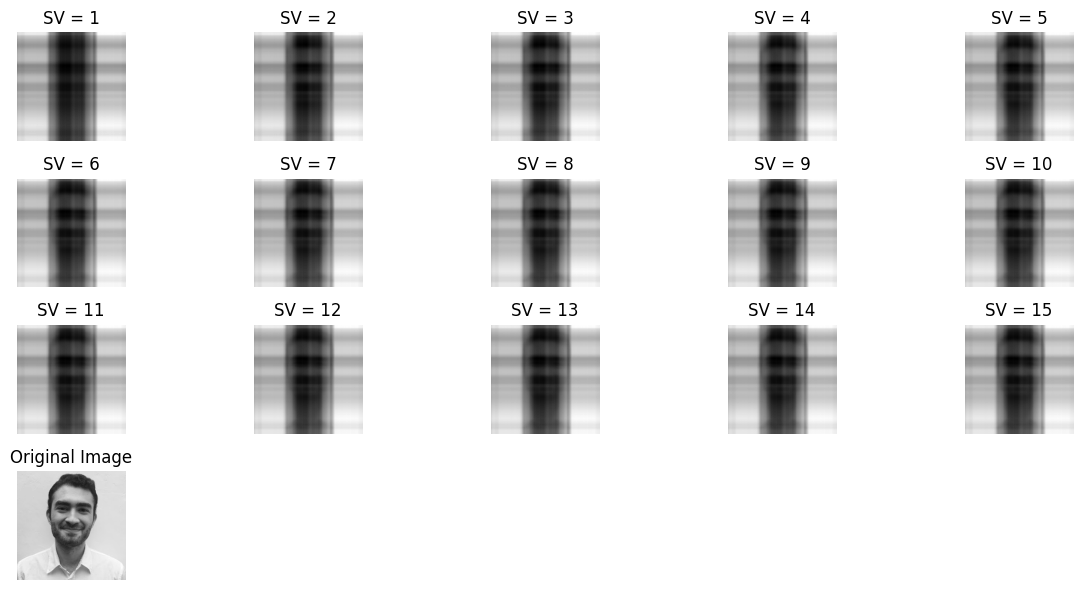

In [120]:
class SVD_class:
    def __init__(self):
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self, matrix):
        self.U, self.S, self.Vt = self._svd_decomposition(matrix)

    def transform(self):
        if self.U is None or self.S is None or self.Vt is None:
            raise ValueError("SVD not computed. Call fit or fit_transform first.")

        # Adjust the dimensions for the dot product
        U = self.U
        S = np.diag(self.S)
        Vt = self.Vt

        return np.dot(U, np.dot(S, Vt))

    def _svd_decomposition(self, A):
        # Implement SVD from scratch (truncated to the rank)
        AAT = np.dot(A, A.T)
        eigenvalues, eigenvectors = np.linalg.eig(AAT)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        singular_values = np.sqrt(eigenvalues)
        U = eigenvectors
        V = np.dot(A.T, U)
        Vt = V.T

        return U, singular_values, Vt

def plot_svd_images(original_image, num_singular_values):
    total_subplots = num_singular_values + 1

    # Determine the number of rows and columns for subplots dynamically
    num_cols = 5
    num_rows = (total_subplots - 1) // num_cols + 1

    plt.figure(figsize=(12, 6))

    # Compute the SVD decomposition once outside the loop
    svd_class = SVD_class()
    svd_class.fit(original_image)  # Ensure that SVD is computed
    U, S, Vt = svd_class.U, svd_class.S, svd_class.Vt

    for i in range(num_singular_values):
        # Reduce the dimensions of U, S, and Vt
        U_reduced = U[:, :i + 1]
        S_reduced = S[:i + 1]
        Vt_reduced = Vt[:i + 1, :]

        # Reconstruct the image using the selected number of singular values
        reconstructed_image = np.dot(U_reduced, np.dot(np.diag(S_reduced), Vt_reduced))

        # Determine the subplot position dynamically
        subplot_pos = i + 1

        # Display the reconstructed image
        plt.subplot(num_rows, num_cols, subplot_pos)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title(f'SV = {i + 1}')
        plt.axis('off')

    # Display the original image
    plt.subplot(num_rows, num_cols, total_subplots)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Load your image matrix (replace 'My_face_matrix' with your actual image matrix)
    # My_face_matrix = ...

    # Define the number of singular values to use (maximum 15 due to available subplots)
    num_singular_values = min(15, min(My_face_matrix.shape))

    # Plot the images with progressively increasing singular values
    plot_svd_images(My_face_matrix, num_singular_values)


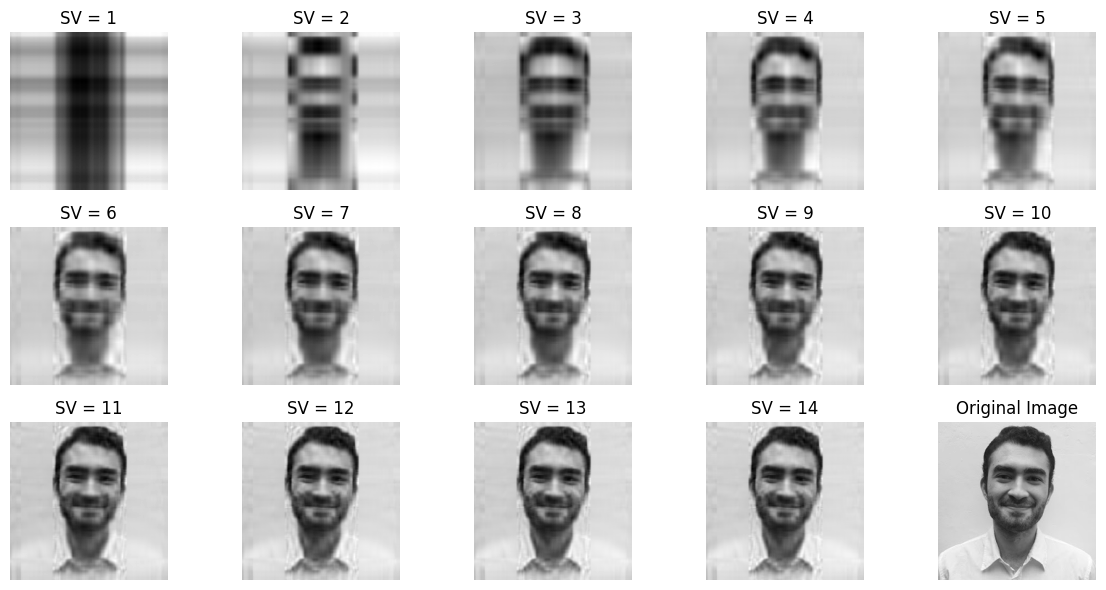

In [121]:
# Perform SVD on the image matrix
U, s, VT = np.linalg.svd(My_face_matrix, full_matrices=False)

# Define the range of singular values to use (e.g., from 1 to the rank of the matrix)
singular_value_range = range(1, min(My_face_matrix.shape) + 1)

# Create a figure to display the images
num_rows = 3
num_cols = 5

# Calculate the total number of subplots
total_subplots = num_rows * num_cols

# Ensure that the number of subplots matches the length of the singular_value_range
if total_subplots > len(singular_value_range):
    total_subplots = len(singular_value_range)

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, num_singular_values in enumerate(singular_value_range[:total_subplots]):
    # Reconstruct the image using the selected number of singular values
    reconstructed_image = np.dot(U[:, :num_singular_values], np.dot(np.diag(s[:num_singular_values]), VT[:num_singular_values, :]))

    # Determine the row and column for this subplot
    row = i // num_cols
    col = i % num_cols
    
    # Display the reconstructed image
    axs[row, col].imshow(reconstructed_image, cmap='gray')
    axs[row, col].set_title(f'SV = {num_singular_values}')
    axs[row, col].axis('off')

# Hide any remaining empty subplots
for i in range(total_subplots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# Display the original image
axs[-1, -1].imshow(My_face_matrix, cmap='gray')
axs[-1, -1].set_title('Original Image')
axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()


As you can see on the results above, the image is appropriately reproduced when we use approximately 14 singular values in the Python built-in method scenario. However, in the class approach scenario, the image remains equally represented from SV= 2 to SV=15, this indicates that in this scenario, the number of iterations are not relevant because you will always get the same result.

## Exercise 5

In [122]:
#First, we need to get the dataset from sklearn
digits = load_digits()

In [123]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [124]:
X = digits.data
y = digits.target

In [125]:
# Here we are going to filter our dataset in order to just take the 0 and 8 digits
X_filtered = X[(y == 0) | (y == 8)]
y_filtered = y[(y == 0) | (y == 8)]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.25, random_state=42)

In [127]:
#Our model has to be naive, so we are going to use a logistic regression model with the default parameters
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [128]:
y_pred = model.predict(X_test)

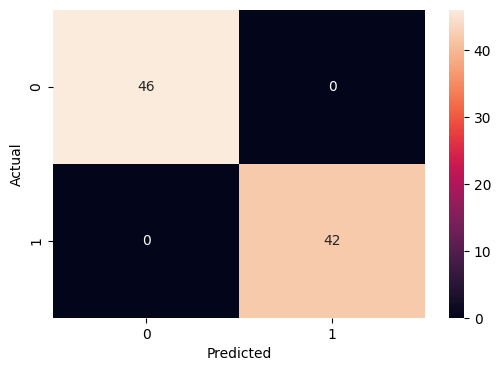

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        42

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



In [129]:
conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,4))


sns.heatmap(conf_mat
            , annot=True  
            , fmt='d'  
           )

plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

# Se imprimen las medidas de rendimiento del modelo
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


As you can see from the results above, the logistic regression model is predicting the values for our target variable (y) perfectly. However, This is because the model is overfitting the data.Therefore, our baseline result is non realistic, and we need to improve our model.

Overfitting means that the model has memorized the training data so well that it may not generalize effectively to unseen data, instead of learning from it.

## Exercise 6

Let's scale the data in order to standardize it. This is beneficial for reduction dimensionality methods:

In [131]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

Let's apply dimensionality reduction methods based on our class approach:

In [133]:
class SVD_class:
    def __init__(self, matrix):
        self.matrix = matrix
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self, matrix = None):
        self.U, self.S, self.Vt = self._svd_decomposition(self.matrix)

    def fit_transform(self, data = None):
        self.fit()
        return self.transform()

    def transform(self):
        if self.U is None or self.S is None or self.Vt is None:
            raise ValueError("SVD not computed. Call fit or fit_transform first.")
        
        # Adjust the dimensions for the dot product
        U = self.U
        S = np.diag(self.S)
        Vt = self.Vt
        
        return np.dot(U, np.dot(S, Vt))

    def _svd_decomposition(self, A):
        # Implement SVD from scratch (truncated to the rank)
        AAT = np.dot(A, A.T)
        eigenvalues, eigenvectors = np.linalg.eig(AAT)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        singular_values = np.sqrt(eigenvalues)
        U = eigenvectors
        V = np.dot(A.T, U)
        Vt = V.T

        return U, singular_values, Vt

In [134]:
# Create an instance of the SVD_class
svd = SVD_class(matrix=X_scaled)  # Assuming X_scaled is your data

# Fit and transform the data
X_svd_class_DR = svd.fit_transform()

# X_svd now contains the reduced dimensionality representation of your data using SVD


In [135]:
# Create an instance of the PCA_class with the desired number of components (e.g., n_components=2)
pca = PCA_class(n_components=2)

# Fit and transform the data
X_pca_class_DR = pca.fit_transform(X_scaled)  # Assuming X_scaled is your data

# X_pca now contains the reduced dimensionality representation of your data using PCA


In [136]:
# Create an instance of the TSNE_class with the desired perplexity (e.g., perplexity=30)
tsne = TSNE_class(perplexity=50)

# Fit and transform the data
X_tsne_class_DR = tsne.fit_transform(X_scaled)  # Assuming X_scaled is your data

# X_tsne now contains the reduced dimensionality representation of your data using t-SNE


Let's plot the two new features generated by each algorithm:

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


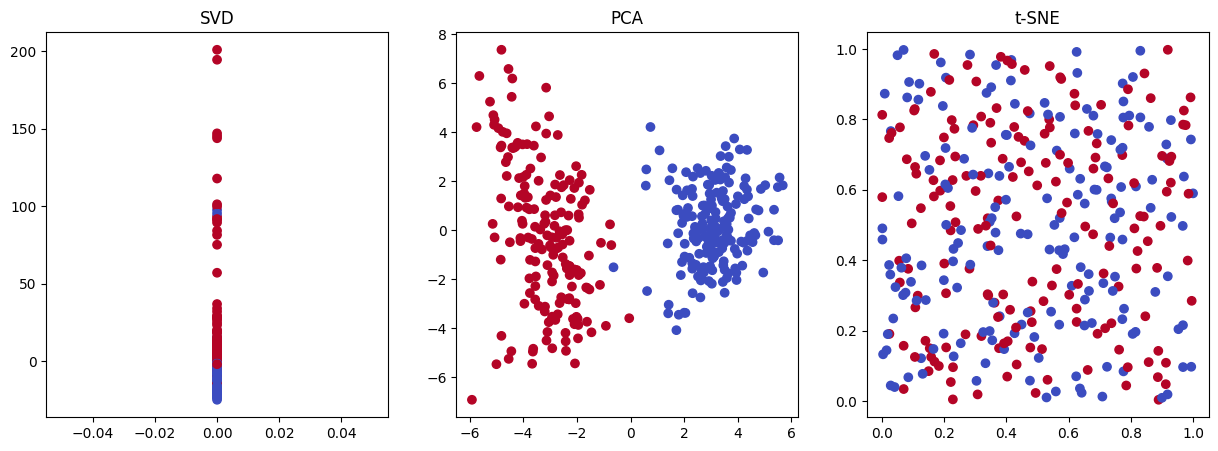

In [137]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_svd_class_DR[:, 0], X_svd_class_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('SVD')

plt.subplot(132)
plt.scatter(X_pca_class_DR[:, 0], X_pca_class_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('PCA')

plt.subplot(133)
plt.scatter(X_tsne_class_DR[:, 0], X_tsne_class_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('t-SNE')

plt.show()

As you can see on the image above, only PCA class is showing a clear separation between the two classes. Aditionally, SVD class is generating complex numbers during the dimensionality reduction process, which is not possible to plot. Therefore, we decided to continue the analysis only with the PCA and tSNE classes results.

In [138]:
# Split the data into train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_filtered, test_size=0.25, random_state=42)

# Train a classifier on the original data
clf_original = LogisticRegression()
clf_original.fit(X_train_scaled, y_train_scaled)
y_pred_original = clf_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test_scaled, y_pred_original)

# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_pca_class_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_pca_class_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - PCA): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - PCA): 1.00


In [139]:
# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_tsne_class_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_tsne_class_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - tSNE): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - tSNE): 0.53


As you can see on the results above, PCA dimensionality reduction is not helping to overcome overfit. This is because the model is still predicting the values for our target variable (y) perfectly. However, tSNE dimensionality reduction is helping to overcome overfit, but the accuracy score after dimensionality reduction is too poor to be considerated.

## Exercise 7

Let's apply dimensionality reduction methods:

In [140]:
# SVD
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)
X_svd_DR = X_scaled @ Vt.T[:, :2]

# PCA
pca = PCA(n_components=2)
X_pca_DR = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne_DR = tsne.fit_transform(X_scaled)

Let's plot the two new features generated by each algorithm:

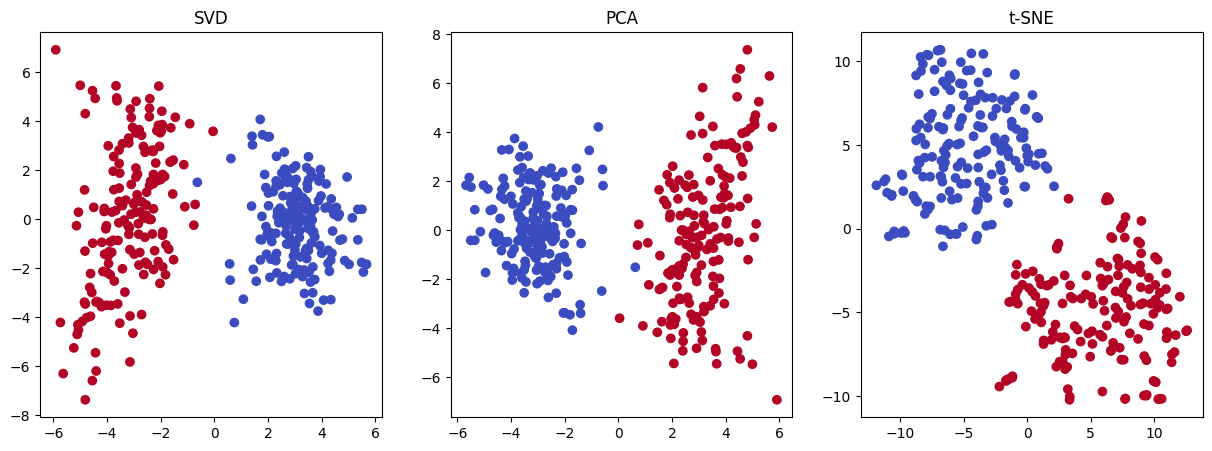

In [141]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_svd_DR[:, 0], X_svd_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('SVD')

plt.subplot(132)
plt.scatter(X_pca_DR[:, 0], X_pca_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('PCA')

plt.subplot(133)
plt.scatter(X_tsne_DR[:, 0], X_tsne_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('t-SNE')

plt.show()


Finally, let's evaluate the impact of reduction dimensionality in the performance of the models:

In [142]:
# Split the data into train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_filtered, test_size=0.25, random_state=42)

# Train a classifier on the original data
clf_original = LogisticRegression()
clf_original.fit(X_train_scaled, y_train_scaled)
y_pred_original = clf_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test_scaled, y_pred_original)

# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_pca_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_pca_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - PCA): {accuracy_reduced:.2f}')


Accuracy (Original Data): 1.00
Accuracy (Reduced Data - PCA): 1.00


In [143]:
clf_reduced = LogisticRegression()
clf_reduced.fit(X_svd_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_svd_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - SVD): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - SVD): 1.00


In [144]:
# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_tsne_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_tsne_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - tSNE): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - tSNE): 1.00


As you can see on the results above, no matter what dimensionality reduction method we use, the performance of the model always conduct to overfitting. This is because the model is memorizing the training data so well that it may not generalize effectively to unseen data, instead of learning from it.

## Exercise 8


**Principal Component Analysis (PCA)** is a widely used linear dimensionality reduction technique that can be enhanced or made more complex by considering various extensions and adaptations. Here are several ways to make PCA more complete and complex:

**Kernel PCA:** Kernel PCA is an extension of PCA that uses the kernel trick to perform nonlinear dimensionality reduction. It projects the data into a higher-dimensional space where linear separation is possible, and then applies PCA in that space. Popular kernels include the radial basis function (RBF) kernel and polynomial kernel.

**Sparse PCA:** Sparse PCA encourages the principal components to be sparse, meaning that they are composed of a small number of original features. This can be useful for feature selection and interpretation of the principal components.

**Incremental PCA:** Standard PCA requires computing the covariance matrix of the entire dataset, which can be memory-intensive for large datasets. Incremental PCA allows you to perform PCA in a more memory-efficient way by processing the data in batches.

**Probabilistic PCA (PPCA):** PPCA extends PCA to a probabilistic framework, which provides a probabilistic interpretation of the principal components. It can be useful when dealing with data uncertainty or when you want to model data generation as a probabilistic process.

**Robust PCA:** Robust PCA is designed to handle outliers in the data. It decomposes the data into a low-rank component (containing the main structure) and a sparse component (containing outliers). This can make PCA more robust to noisy or contaminated data.

**Non-negative Matrix Factorization (NMF):** NMF is an alternative to PCA that enforces non-negativity constraints on the components. It is particularly useful for data that naturally has non-negative values, such as text data or image data.

**Deep Autoencoders:** Deep learning techniques like autoencoders can be used for nonlinear dimensionality reduction. Stacked autoencoders or variations like Variational Autoencoders (VAEs) can capture complex relationships in the data.

**Incremental or Online Learning:** You can adapt PCA to an incremental or online learning setting, where it updates the principal components as new data becomes available. This is useful for applications where data is streaming or constantly changing.

**Feature Engineering:** Before applying PCA, you can perform feature engineering to create new features or transformations that capture important aspects of your data. These engineered features can then be used as input to PCA.

**Custom Distance Measures:** Instead of using the standard Euclidean distance metric, you can define custom distance measures that better capture the relationships between your data points. This can be particularly useful when dealing with specialized data types.

**Dimensionality Selection:** Carefully choose the number of principal components to retain based on your specific application. Techniques like scree plots, explained variance plots, or cross-validation can help you determine the optimal number of components.

**Visualization Techniques:** PCA can be combined with advanced visualization techniques, such as t-SNE or UMAP, to create more informative visualizations of high-dimensional data.

**Regularization:** You can introduce regularization terms to PCA to control the complexity of the principal components and prevent overfitting.

The choice of which enhancement to use depends on your specific data, objectives, and the underlying assumptions about your data. Experimentation and understanding the characteristics of your data are key to selecting the most suitable approach to make PCA more complete and complex for your needs.

There are two strong applications of robust PCA. These are video surveillance and Face recognition:

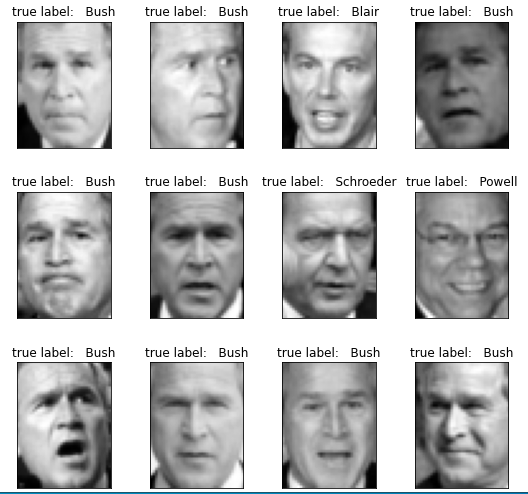

## Exercise 9

**Uniform Manifold Approximation and Projection (UMAP)** is an increasingly popular dimensionality reduction technique.

UMAP, at its core, works very similarly to t-SNE - both use graph layout algorithms to arrange data in low-dimensional space. In the simplest sense, UMAP constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible. While the mathematics UMAP uses to construct the high-dimensional graph is advanced, the intuition behind them is remarkably simple.

UMAP begins by constructing a fuzzy topological representation of the data, which captures the relationships between data points in high-dimensional space. In order to construct the initial high-dimensional graph, UMAP builds something called a "fuzzy simplicial complex". This is really just a representation of a weighted graph, with edge weights representing the likelihood that two points are connected. To determine connectedness, UMAP extends a radius outwards from each point, connecting points when those radii overlap. Choosing this radius is critical - too small a choice will lead to small, isolated clusters, while too large a choice will connect everything together. UMAP overcomes this challenge by choosing a radius locally, based on the distance to each point's nth nearest neighbor. UMAP then makes the graph "fuzzy" by decreasing the likelihood of connection as the radius grows. Finally, by stipulating that each point must be connected to at least its closest neighbor, UMAP ensures that local structure is preserved in balance with global structure.

UMAP then optimizes this fuzzy topological representation using stochastic gradient descent to create a low-dimensional representation that preserves the important topological features of the data.

The low-dimensional representation is further simplified to ensure that the data points are evenly distributed across the space, reducing crowding effects that can occur in t-SNE.

 UMAP can also be adapted for supervised dimension reduction, where it considers class labels or target values to guide the dimensionality reduction process. **This makes it useful for tasks like visualization, clustering, and classification.**

 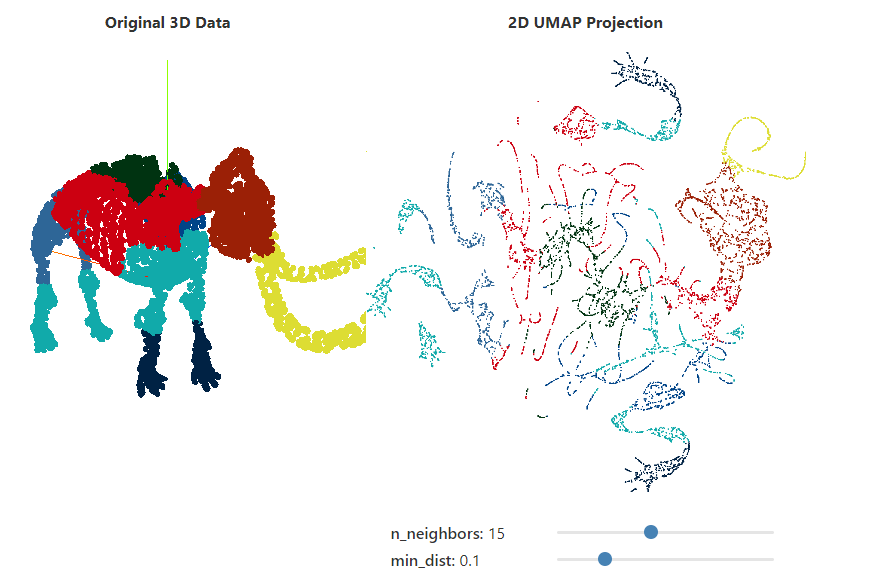

 ### **Field of applications**

 * UMAP is excellent at preserving the global structure of high-dimensional data while reducing it to a more manageable number of dimensions (usually 2 or 3), making it suitable for visualization.

 * UMAP can be used as a preprocessing step for clustering high-dimensional data. The reduced-dimensional representation often improves the quality of clustering results.

 * It can help in identifying outliers and anomalies in high-dimensional datasets.

 *  UMAP can be employed as a feature engineering technique to create new features for machine learning models.

 * It aids in understanding complex datasets and uncovering patterns or relationships between data points.

 * UMAP can be used to visualize embeddings produced by deep learning models in fields like natural language processing and computer vision.

## Exercise 10

**Latent Dirichlet Allocation (LDA)** is a probabilistic model used for topic modeling and dimensionality reduction in text data. It was introduced by Blei, Ng, and Jordan in a paper published in 2003. LDA is primarily used for uncovering the underlying topics within a collection of documents and is based on certain mathematical principles:

* LDA is based on a generative probabilistic model of text documents. It assumes that documents are generated through a probabilistic process.

* It posits that there are a fixed number of topics in a corpus, and each document is a mixture of these topics, with each topic represented as a distribution over words.

* LDA assumes that the distribution of topics in a document and the distribution of words in a topic are both drawn from a Dirichlet distribution.

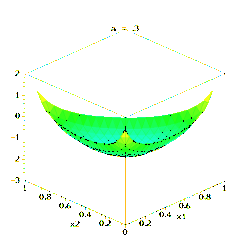

The Dirichlet distribution is a conjugate prior in Bayesian statistics, making it mathematically convenient for modeling.

* LDA often uses plate notation to represent the generative process visually. In plate notation, rectangles represent repeated processes.

* It visually depicts how topics, documents, and words are generated based on their probabilistic relationships.

* The main mathematical challenge in LDA is to infer the latent (hidden) variables, i.e., the topic distributions for documents and word distributions for topics, given the observed data (the words in the documents).

* This is typically done using variational inference or Gibbs sampling techniques, which involve optimization and probability theory.


### **Fields of applications**

* LDA is primarily used for discovering topics within a collection of documents. It identifies the topics and their corresponding word distributions that best explain the content of the documents.

* LDA can be used to summarize the main topics or themes within a large corpus of documents, helping users get an overview of the content.

* LDA can improve the performance of information retrieval systems by associating documents with topics and using these associations to match user queries to relevant documents.

* It is employed in content recommendation systems to suggest articles, documents, or products to users based on their preferences for certain topics.

* LDA can be used as a preprocessing step for sentiment analysis by first identifying the main topics within a collection of user-generated content and then analyzing sentiment within those topics.

* LDA can be used to cluster similar documents together based on their topic distributions, aiding in organizing and navigating large document collections.

* LDA-generated topics can be used as features for text classification tasks, making it easier to classify documents into predefined categories.